# SI 618 - Homework #3: Data Visualization

Version 2024.01.31.3.CT

For this homework assignment, you will use the small MovieLens dataset, available via https://files.grouplens.org/datasets/movielens/ml-latest-small.zip. Download that file to get the data, and also take some time to go through the [README](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) file.

Be sure to download your own copy of the dataset -- do not rely on data that you may have downloaded for a previous assignment.

A major challenge for you in this assignment is to devise a plan to tackle each question.  The question states the overall goal, and in some cases hints are provided, but you will need to think carefully about what data you need to answer each of the questions.  You may need to do some preprocessing of the data to get it into a form that you can use for visualization.


Each of the questions is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

**NOTE**: You are only permitted to use the pandas, Seaborn, and matplotlib libraries for creating visualizations in this assignment. You may use other libraries for other purposes, but you may not use them to create visualizations.

<hr>

First, let's do our usual imports (you might need to import additional modules depending on how you choose to tackle each question):

In [545]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

And let's read the data (note: you might need to include path information when you read the data in, depending on where you place the data file):

In [546]:
movies = pd.read_csv('~/Downloads/ml-latest-small/movies.csv')
ratings = pd.read_csv('~/Downloads/ml-latest-small/ratings.csv')
tags = pd.read_csv('~/Downloads/ml-latest-small/tags.csv')

In [547]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### Q1: 
Using the `movies` DataFrame, create a visualization that shows the number of movies for each decade from the 1900s to the 2010s.  Use the number in parentheses (e.g. (1975)) at the end of the title as the year.  Drop all rows that do not have a valid year. Be sure to include a title and axis labels.

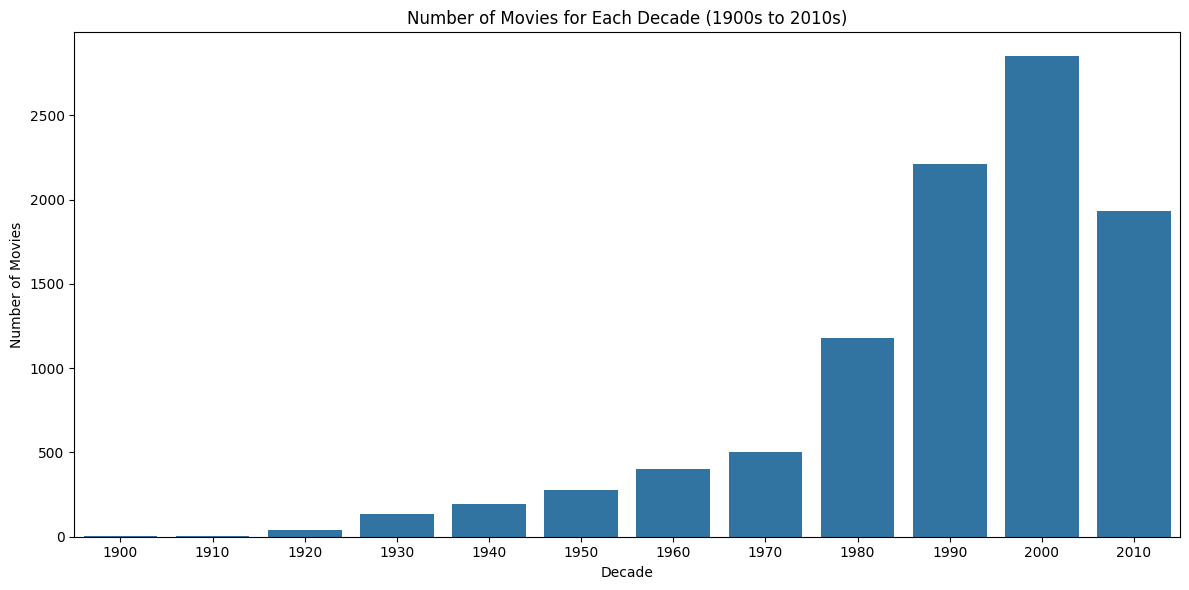

In [562]:
# Extract the year from the title and store it in a new column
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
# Drop rows with missing or invalid year information
movies = movies.dropna(subset=['year'])
# Convert the year to integer using .loc to avoid SettingWithCopyWarning
# Code generated by ChatGPT
movies.loc[:, 'year'] = movies['year'].astype(int)
# Calculate the decade and store it in a new column using .loc to avoid SettingWithCopyWarning
# Code generated by ChatGPT
movies.loc[:, 'decade'] = (movies['year'] // 10) * 10

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='decade', data=movies)
# Set plot title and labels
plt.title('Number of Movies for Each Decade (1900s to 2010s)')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

**Code Interpretation:**
The code above extracts release year information from movie titles in the 'movies' DataFrame using a regular expression pattern, ensuring data integrity by dropping rows with missing or invalid year entries. Subsequently, it converts the extracted years to integers and computes the corresponding decades, storing this data in a new 'decade' column. With the decade information prepared, a count plot is generated using Seaborn's `countplot()` function, depicting the distribution of movies across different decades. This visualization offers insights into the temporal trends of movie releases over time, presenting a concise overview of the cinematic landscape from the early 1900s to the 2010s.

**Visualization Interpretation:**
From the count plot, we can see that the number of released movies have gradually increased over the years, with the most number of movies being released in the 2000s.

### Q2: 
Create a visualization that shows the number of movies in each genre.

**Hint**: the `pd.DataFrame.explode()` function might be useful here.

Be sure that your axis labels are legible!

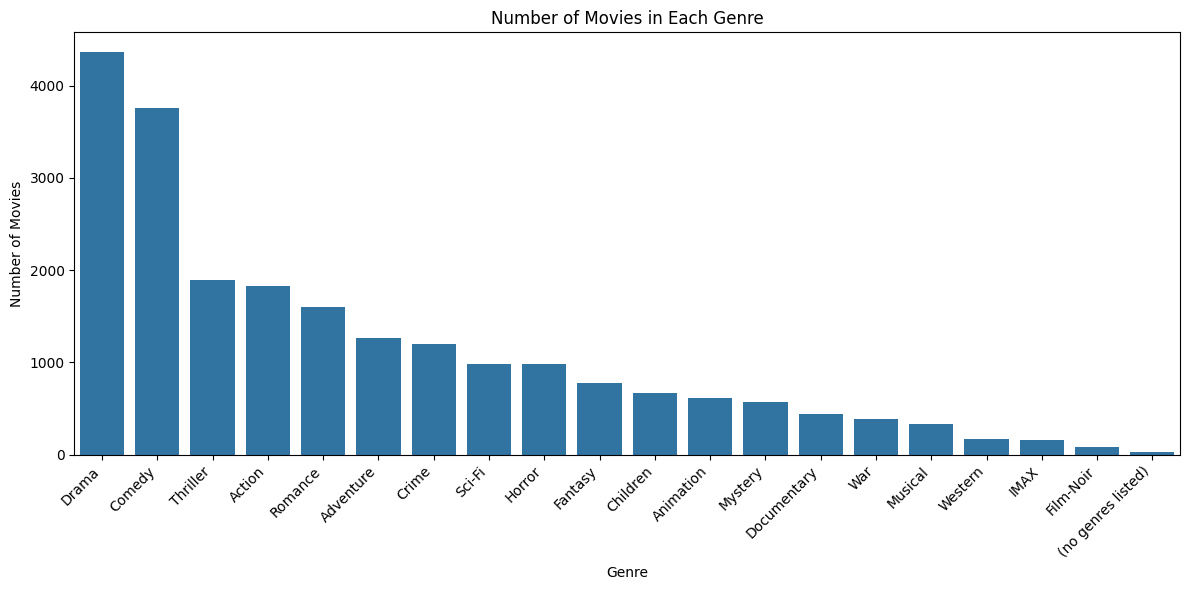

In [549]:
# Split the genres and explode the data frame
movies_exploded = movies.assign(
    genres=movies['genres'].str.split('|')).explode('genres')

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='genres', data=movies_exploded,
              order=movies_exploded['genres'].value_counts().index)
# Set plot title and labels
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

**Code Interpretation:**
The code begins by splitting the genres listed in the 'genres' column of the 'movies' DataFrame and then exploding the DataFrame, resulting in multiple rows for each movie, each corresponding to a single genre. This transformation allows for a granular analysis of movie genres. Subsequently, a count plot is generated using Seaborn's `countplot()` function, which visualizes the number of movies belonging to each genre. The plot provides a comprehensive overview of genre distribution in the dataset, offering insights into the prevalence of different genres within the movie collection. The x-axis displays the various genres, while the y-axis represents the count of movies within each genre. By observing this plot, one can easily identify the most common genres and their relative frequencies, aiding in understanding the genre preferences within the dataset. Adjustments such as rotating the x-axis labels enhance the plot's readability, ensuring clear interpretation of the genre distribution.

**Visualization Interpretation:**
From the count plot, we can see that the genre that has the most movies associated with it is Drama, then Comedy, Thriller, Action, et cetera, all the way to Film-Noir and lastly, unlisted movies.


### Q3a: 
Create a visualization showing the distribution of the values from the `rating` column of the `ratings` DataFrame.  


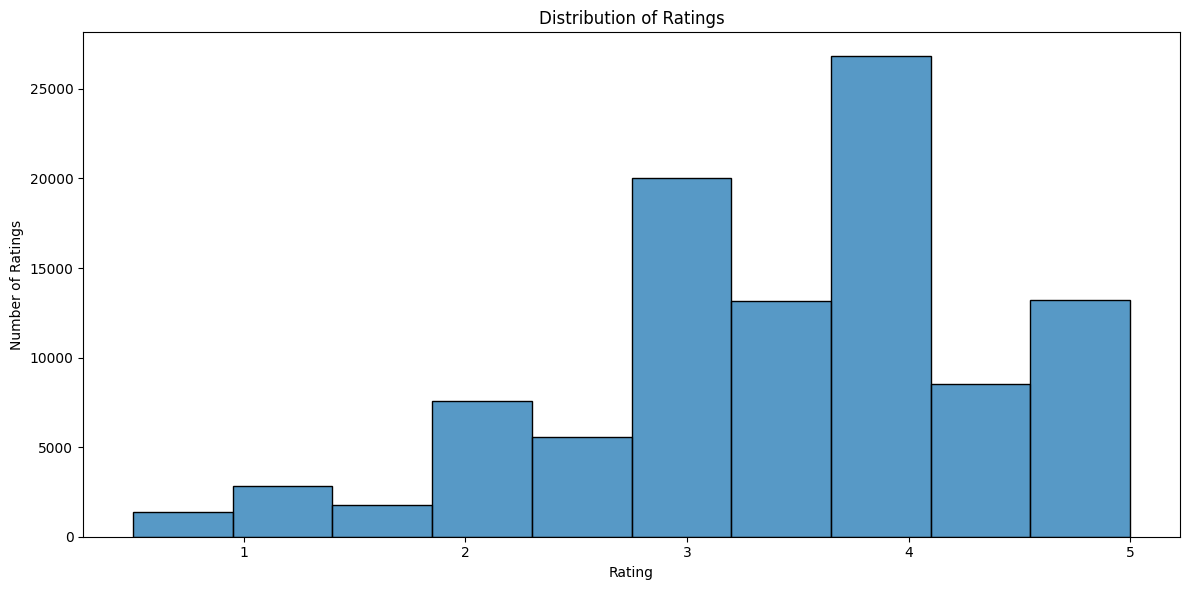

In [550]:
# Create a histogram of the ratings
plt.figure(figsize=(12, 6))
sns.histplot(ratings['rating'], bins=10, kde=False)
# Set plot title and labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.show()

**Code Interpretation:**
The code generates a histogram visualizing the distribution of ratings in the dataset. With a figure size of 12 by 6 inches, the histogram depicts the frequency of different rating values. The ratings are binned into 10 intervals, allowing for a coarse-grained analysis of their distribution. By disabling the kernel density estimation (KDE) using the `kde=False` parameter, the focus remains solely on the frequency distribution without additional smoothing. The plot's title, 'Distribution of Ratings,' along with appropriately labeled x and y axes ('Rating' and 'Number of Ratings,' respectively), ensures clarity in understanding the visualized data. This histogram provides valuable insights into the distribution of ratings, enabling quick identification of common rating values and their relative frequencies within the dataset. Adjustments such as tight layout and an adequate figure size enhance the plot's readability and interpretability.

**Visualization Interpretation:**
From the histogram, we can see that 4.0 is the most popular rating score with over 25000 4.0 ratings, followed by 3.0 and 3.5. There seems to be a gradual progression of ratings, with whole ratings being more popular compared to the half-ratings.

### Q3b:
What do you notice about the relative number of whole-number ratings (1,2,3,4,and 5) compared to the half-ratings (0.5, 1.5, 2.5, 3.5, 4.5)?  Investigate the data further to see if you can figure out why that's the case.  (Hint: a scatterplot showing the ratings vs. time might be helpful.)

Insert your observations here.

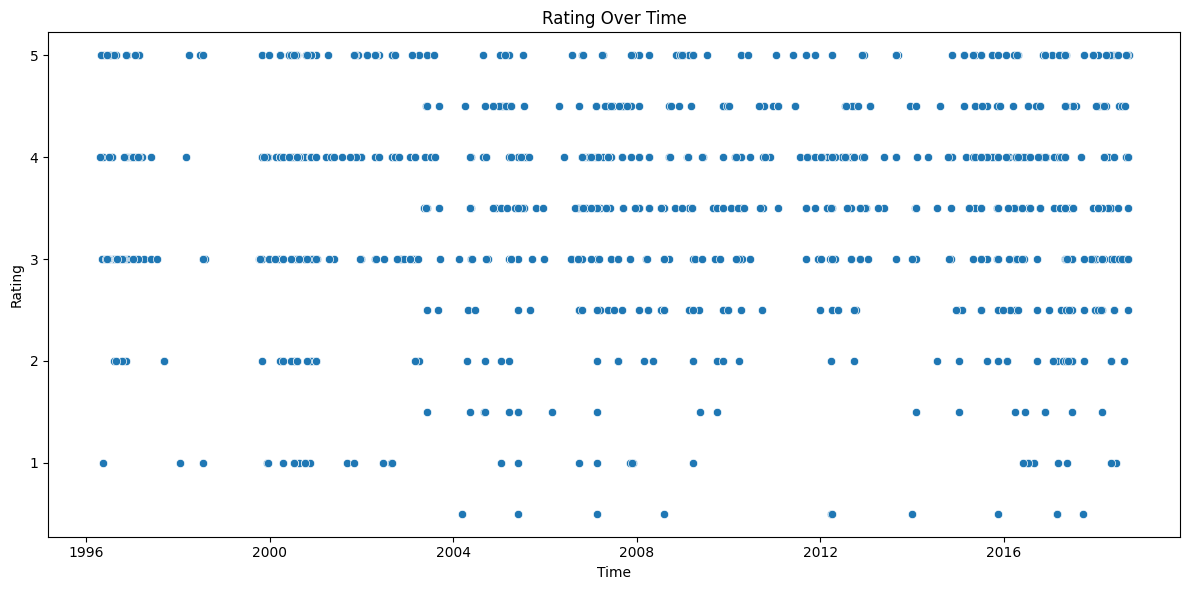

In [551]:
# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='timestamp', y='rating', data=ratings.sample(1000))
# Set plot title and labels
plt.title('Rating Over Time')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

**Code Interpretation:**
The code first converts the 'timestamp' column in the 'ratings' DataFrame to datetime format, interpreting the values as Unix timestamps. This conversion enables a temporal analysis of ratings data. Subsequently, a scatter plot is generated to visualize the relationship between time and rating values. By sampling 1000 data points from the ratings dataset, the plot provides a representative overview of rating trends over time. The x-axis represents time, with each data point corresponding to a specific timestamp, while the y-axis denotes the rating assigned to a movie. The plot's title, 'Rating Over Time,' along with appropriately labeled x and y axes ('Time' and 'Rating,' respectively), facilitates clear interpretation of the data. This scatter plot offers insights into the temporal dynamics of movie ratings, potentially revealing patterns or trends in audience preferences or behavior over time. The use of a tight layout ensures optimal visualization and readability of the plot.

**Visualization Interpretation**
From the scatterplot, we can confirm that the half-ratings are not as popular as the whole ratings for every rating scale and for every decade. This observation provides valuable insights into audience preferences and behavior regarding rating granularity over time. It indicates a tendency for viewers to lean towards whole numbers when assigning ratings to movies, irrespective of the rating scale or the era in which the movies were released.

### Q4:
Write code to confirm the assertion that the ratings ["were created by 610 users between March 29, 1996 and September 24, 2018."](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

In [552]:
# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Extract and count the unique user ids
user_counts = ratings['userId'].unique()
print("Number of unique users:", len(user_counts))

# Extract the date from the timestamp
ratings['date'] = ratings['timestamp'].dt.date

# Check the minimum and maximum timestamps
print("First date and timestamp:", ratings['date'].min())
print("Last date timestamp:", ratings['date'].max())

Number of unique users: 610
First date and timestamp: 1996-03-29
Last date timestamp: 2018-09-24


### Q5:
Create a visualization showing the number of ratings produced on each day of the week.  

Hint: the `pd.to_datetime()` function might be useful here, as well as the `dt` accessor.

Make sure your axis labels are in a reasonable order.

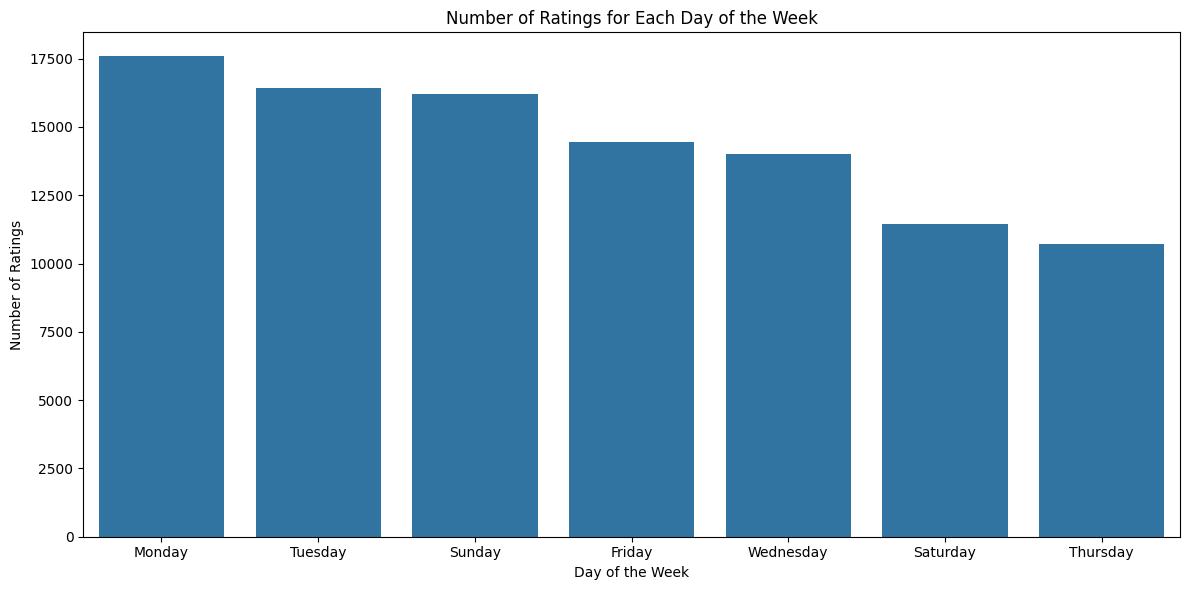

In [553]:
# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Extract the day of the week from the timestamp
ratings['day_of_week'] = ratings['timestamp'].dt.day_name()

# Count ratings for each day of the week
day_of_week_counts = ratings['day_of_week'].value_counts()

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=ratings, order=day_of_week_counts.index)
# Set plot title and labels
plt.title('Number of Ratings for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.show()

**Code Interpretation:**
This code snippet first converts the 'timestamp' column in the 'ratings' DataFrame to datetime format, interpreting the values as Unix timestamps. Then, it extracts the day of the week from the timestamp and calculates the count of ratings for each day of the week. A count plot is then generated using Seaborn's `countplot()` function, visualizing the distribution of ratings across different days of the week. The x-axis represents the days of the week, while the y-axis indicates the number of ratings received on each respective day. This plot provides a clear overview of rating activity throughout the week, enabling insights into potential patterns or trends in user engagement with movie ratings over different weekdays. The plot's title and labeled axes enhance readability and interpretation of the visualized data.

**Visualization Interpretation:**
From the count plot, we can infer that the most number of ratings produced is on Monday, then Tuesday, Sunday, Friday, Wednesday, Saturday, and finally, Thursday.

### Q6a:

Create a new column called `taglength` in the `tags` DataFrame that contains the number of **characters** in the tag.

**Hint:** the `str.len()` function might be useful here.

In [554]:
# Create a new column taglength to store the number of characters in each tag
tags['taglength'] = tags['tag'].str.len()

# Print the first few rows of the tags data frame to verify the changes
tags.head()

,userId,movieId,tag,timestamp,taglength
0,2,60756,funny,1445714994,5
1,2,60756,Highly quotable,1445714996,15
2,2,60756,will ferrell,1445714992,12
3,2,89774,Boxing story,1445715207,12
4,2,89774,MMA,1445715200,3


### Q6b: 
Create a histogram of your newly created `taglength` column.  Experiment with different numbers of bins (or binwidths) until you're happy with the representation.

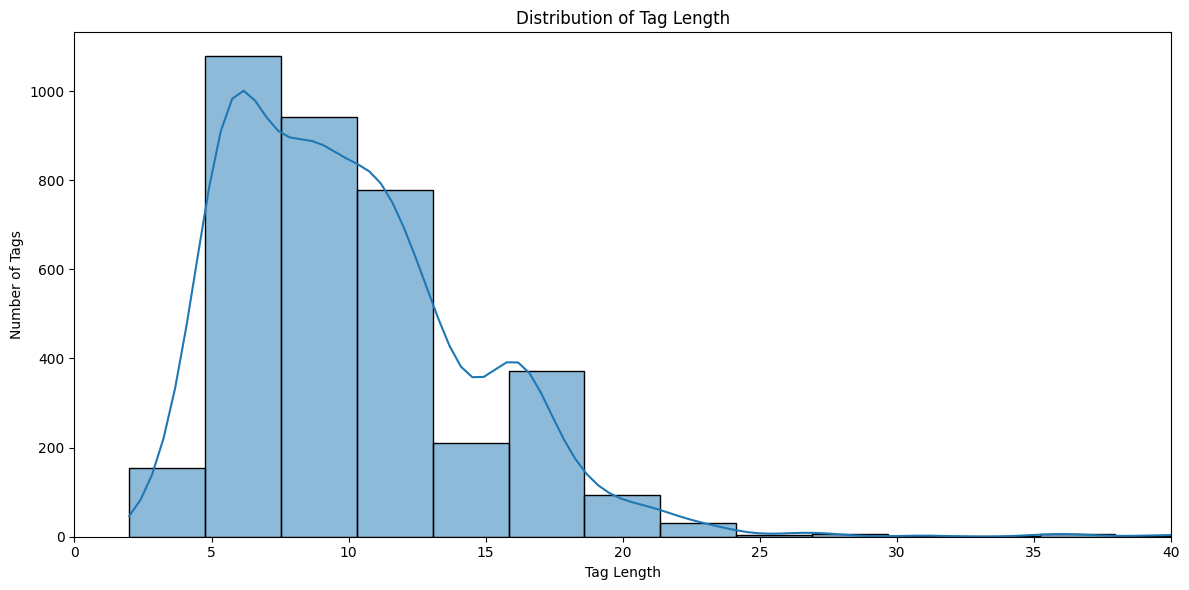

In [555]:
# Create a histogram of the newly created taglength column
plt.figure(figsize=(12, 6))
sns.histplot(tags['taglength'], bins=30, kde=True)
# Set plot title and labels
plt.title('Distribution of Tag Length')
plt.xlabel('Tag Length')
plt.ylabel('Number of Tags')
plt.xlim(0, 40)
plt.tight_layout()
plt.show()

**Code Interpretation:**
This code generates a histogram for the 'taglength' column in the 'tags' DataFrame, representing the distribution of tag lengths. With a figure size of 12 by 6 inches, the histogram is created using Seaborn's `histplot()` function, with 30 bins to display the frequency distribution of tag lengths. Additionally, a kernel density estimation (KDE) curve is included to provide a smooth estimate of the probability density function. The plot's title is set as 'Distribution of Tag Length', and the x and y axes are appropriately labeled as 'Tag Length' and 'Number of Tags', respectively. The x-axis limit is constrained to between 0 and 40 to focus on the main distribution. Overall, this visualization offers insights into the distribution of tag lengths in the dataset, aiding in understanding the characteristics of tags used in the context of the data.

**Visualization Interpretation:**
From the histogram, we can see that a tag length of 5-10 has the highest frequency, and anything above 25 is almost non-existent.

### Q7:
Create a visualization that shows the average rating for each genre.


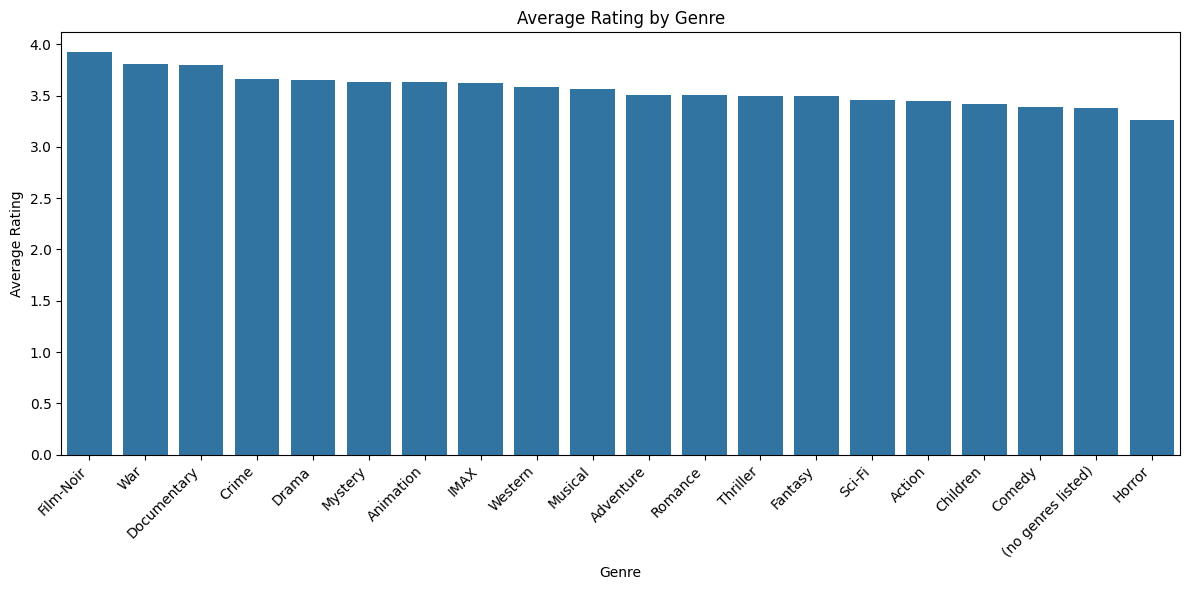

In [556]:
# Merge movies and ratings datasets
merged_data = pd.merge(movies, ratings, on='movieId')

# Split genres into separate rows
merged_data['genres'] = merged_data['genres'].str.split('|')
genres_data = merged_data.explode('genres')

# Group by genre and calculate the average rating
average_rating_per_genre = genres_data.groupby(
    'genres')['rating'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_rating_per_genre.index,
            y=average_rating_per_genre.values)
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Code Interpretation:**
This code snippet performs several data manipulation and visualization steps. Initially, it merges the 'movies' and 'ratings' datasets based on the 'movieId' column. It then splits the genres listed in the 'genres' column into separate rows and creates a new DataFrame 'genres_data' with the exploded genres. Next, it groups the data by genre and calculates the average rating for each genre, sorting the results in descending order. Finally, it creates a bar plot using Seaborn's `barplot()` function, visualizing the average rating for each genre. The x-axis displays the genres, while the y-axis represents the corresponding average ratings. This visualization provides a clear overview of the average ratings across different movie genres, facilitating easy comparison and interpretation of the data.

**Visualization Interpretation:**
From the bar plot, we can see that the Film-Noir genre has the highest average rating, followed by War, Documentary, Crime, etc. and the genre that has the least average rating is Horror.

### Q8:
Create a visualization that shows the distribution of the **number** of ratings of "good" movies (i.e., those with a mean rating of 3.5 or highter) and "bad" movies (i.e., those with a mean rating of less than 3.5), broken down by the decade when the movie was released.

Note that you are not being asked to create a visualization that shows the distribution of the ratings themselves, but rather the distribution of the **number** of ratings for each of the two groups of movies.

**Hint:** You will need to join the `movies` and `ratings` DataFrames to get the decade information.

**Hint:** You may want to create a box plot or a violin plot (or both).

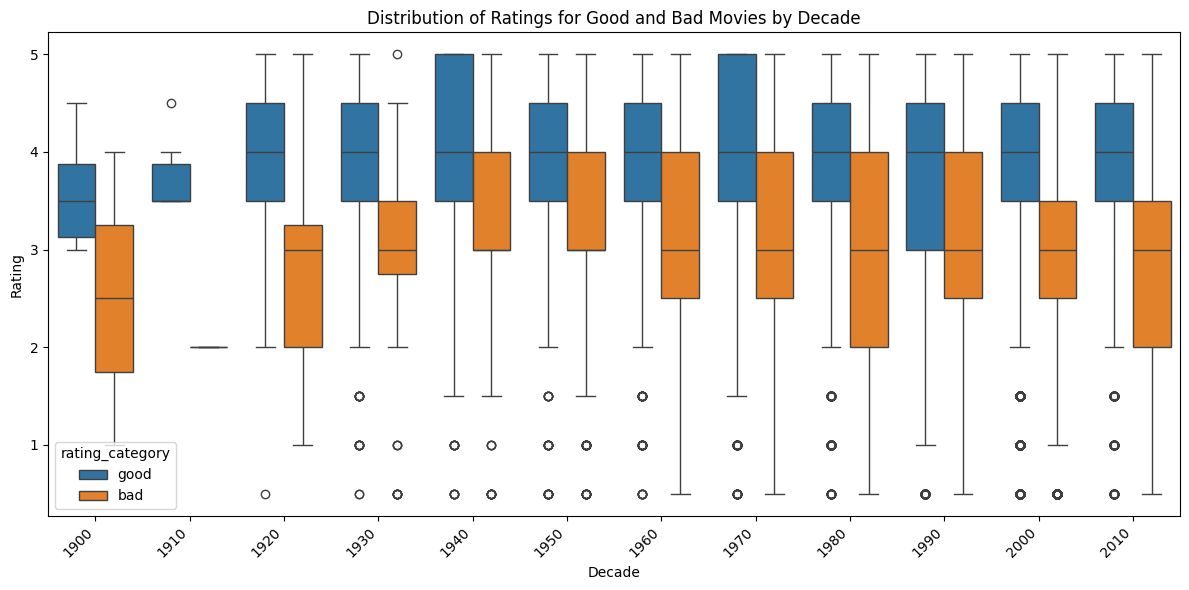

In [564]:
# Merge movies and ratings based on movieId
merged_df = pd.merge(movies, ratings, on='movieId', how='inner').dropna()

# Calculate the mean rating for each movie
mean_ratings = merged_df.groupby('movieId')['rating'].mean().reset_index()

# Merge mean_ratings with the movies DataFrame
merged_df = pd.merge(merged_df, mean_ratings,
                     on='movieId', suffixes=('', '_mean'))

# Categorize movies as "good" or "bad" based on the average rating
merged_df['rating_category'] = np.where(
    merged_df['rating_mean'] >= 3.5, 'good', 'bad')

# Extract decade information from release year
merged_df['decade'] = (pd.to_datetime(
    merged_df['year'], format='%Y', errors='coerce').dt.year // 10) * 10

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='decade', y='rating', hue='rating_category', data=merged_df)
plt.title('Distribution of Ratings for Good and Bad Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Code Interpretation:**
This code snippet performs a series of data processing and visualization steps. It begins by merging the 'movies' and 'ratings' DataFrames based on the 'movieId' column using an inner join and dropping any rows with missing values. Then, it calculates the mean rating for each movie and merges this information back into the merged DataFrame. Movies are categorized as "good" or "bad" based on whether their average rating exceeds or falls below 3.5, respectively. Next, decade information is extracted from the release year of each movie. Finally, a box plot is generated using Seaborn's `boxplot()` function, visualizing the distribution of ratings for good and bad movies across different decades. The x-axis represents decades, the y-axis depicts ratings, and the hue distinguishes between good and bad movies. This visualization offers insights into how ratings vary over time for different categories of movies, facilitating comparison and analysis of rating trends across decades.

**Visualization Interpretation:**
From the box plot, we can infer that for every decade, there have been more good movies than bad. There are also significant outliers in every decade for the distribution of the **number** of ratings of "good" movies and "bad" movies.

## END OF NOTEBOOK